In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv(r"C:\Users\ABDUL_HADI\Desktop\ML Lab\KNN and Niave_Bayes\diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: >

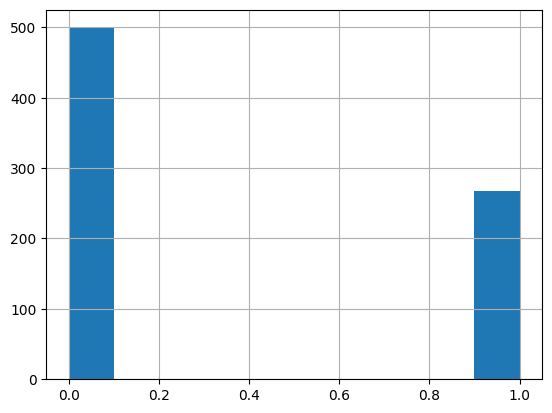

In [4]:
data["Outcome"].hist()

In [8]:
# corr = data.iloc[:,:-1].corr(method="pearson")
# cmap = sns.diverging_palette(250,354,80,60,center='dark',as_cmap=True)
# sns.heatmap(corr, vmax=1, vmin=-.5, cmap=cmap, square=True, linewidths=.2)

In [10]:
from sklearn.model_selection import train_test_split

X = data.drop(["Outcome"] , axis=1)
y = data["Outcome"]

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

In [12]:
print("Training set size:", X_train.shape, y_train.shape)
print("Testing set size:", X_test.shape, y_test.shape)

Training set size: (614, 8) (614,)
Testing set size: (154, 8) (154,)


In [14]:
class_prior = y.value_counts(normalize=True).to_dict()

In [16]:
class_stats = {}

for feature in X.columns:
    class_stats[feature] = {}
    for cls in np.unique(y):
        cls_data = X[y == cls][feature]
        mean = cls_data.mean()
        var = cls_data.var()
        class_stats[feature][cls] = {'mean': mean, 'var': var}


In [18]:
def gaussian_probability(x, mean, var):
    exponent = np.exp(-((x - mean) ** 2) / (2 * var))
    return (1 / np.sqrt(2 * np.pi * var)) * exponent


In [20]:
def predict(X_test):
    predictions = []
    for _, x in X_test.iterrows():
        posteriors = {}
        for cls in class_prior:
            prior = np.log(class_prior[cls])
            likelihood = 0
            for feature in X.columns:
                mean = class_stats[feature][cls]['mean']
                var = class_stats[feature][cls]['var']
                likelihood += np.log(gaussian_probability(x[feature], mean, var))
            posteriors[cls] = prior + likelihood
        predictions.append(max(posteriors, key=posteriors.get))
    return predictions


In [22]:
y_pred = predict(X)

# Accuracy
accuracy = np.mean(y_pred == y)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.76


In [ ]:
np.unique(y)

In [ ]:
cls_data